In [38]:
#importing packages
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
#download nlp toolkit
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
#printing stop words in english
print(stopwords.words('english'))
print(len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
#reading data set and printing first 5 rows
news_data = pd.read_csv("newsdata.csv")
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
#printing text in row 1
print(news_data["text"][0])

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails 

In [42]:
#checking size of rows and columns 
news_data.shape

(20800, 5)

In [43]:
#checking for null values in data
news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [44]:
#droppping rows eith empty text data
news_data = news_data.dropna(subset=['text'])

In [45]:

news_data['title'] = news_data['title'].fillna('')

In [46]:
news_data['author'] = news_data['author'].fillna('Unknown')

In [47]:
news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [48]:
news_data.shape

(20761, 5)

In [49]:
#merging news title with author name
news_data["merge"] = news_data["title"]+ " " + news_data["author"]

In [50]:
#printing merged column
print(news_data["merge"])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799              What Keeps the F-35 Alive David Swanson
Name: merge, Length: 20761, dtype: object


In [51]:
#separating features and response values
x = news_data.drop(columns = "label" , axis = 1)
y = news_data["label"]
print(x.head())

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  Ever get the feeling your life circles the rou...   
2  Why the Truth Might Get You Fired October 29, ...   
3  Videos 15 Civilians Killed In Single US Airstr...   
4  Print \nAn Iranian woman has been sentenced to...   

                                               merge  
0  House Dem Aide: We Didn’t Even See Comey’s Let...  
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...  
2  Why the Truth 

In [53]:
#applying porter stemmer to reduce words into root form
pstem = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [57]:
#function to stem texts
def stemm(merge):
    text = re.sub('[^a-zA-Z]',' ',merge)
    text = text.lower()
    text = text.split()
    text = [pstem.stem(word) for word in text if word not in stop_words]
    text = ' '.join(text)
    return text

In [58]:

news_data["merge"] = news_data["merge"].apply(stemm)

In [60]:
print(news_data["merge"].head())

0    hous dem aid even see comey letter jason chaff...
1    flynn hillari clinton big woman campu breitbar...
2               truth might get fire consortiumnew com
3    civilian kill singl us airstrik identifi jessi...
4    iranian woman jail fiction unpublish stori wom...
Name: merge, dtype: object


In [61]:
#separating x and y values
x = news_data['merge'].values
y = news_data['label'].values

In [77]:
print(x)
print(y)


['hous dem aid even see comey letter jason chaffetz tweet darrel lucu'
 'flynn hillari clinton big woman campu breitbart daniel j flynn'
 'truth might get fire consortiumnew com' ...
 'maci said receiv takeov approach hudson bay new york time michael j de la merc rachel abram'
 'nato russia hold parallel exercis balkan alex ansari'
 'keep f aliv david swanson']
[1 0 1 ... 0 1 1]


(20761,)

In [81]:
#converting text into numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(x)
x = vectorizer.transform(x)

In [82]:
print(x)

  (0, 15534)	0.28484839382359867
  (0, 13344)	0.2565797237055283
  (0, 8819)	0.36361560069704985
  (0, 8544)	0.2921248817068552
  (0, 7613)	0.2478398696118434
  (0, 6928)	0.21872143133600472
  (0, 4910)	0.23330067979055175
  (0, 3746)	0.27052710412864495
  (0, 3555)	0.35991212979811754
  (0, 2923)	0.24683241275458936
  (0, 2454)	0.36767229408002416
  (0, 263)	0.27009498808160637
  (1, 16638)	0.3007095078153714
  (1, 6740)	0.1904663517177972
  (1, 5438)	0.7143463265050893
  (1, 3523)	0.263719162963963
  (1, 2778)	0.19094659329911978
  (1, 2195)	0.382747546433888
  (1, 1868)	0.15517018061483198
  (1, 1475)	0.2939792831498172
  (2, 15459)	0.41545041426581664
  (2, 9526)	0.4935396087216282
  (2, 5898)	0.34744131866696565
  (2, 5324)	0.3866450296270738
  (2, 3064)	0.4609896163315894
  :	:
  (20758, 12996)	0.24781657559616727
  (20758, 12227)	0.27216265384498983
  (20758, 12022)	0.2473472090241594
  (20758, 10206)	0.08019724282245004
  (20758, 9494)	0.17422582401485676
  (20758, 9425)	0.2949

In [86]:
#splitting data into training and testing set
xtrain, xtest, ytrain,  ytest = train_test_split(x, y , random_state = 42, stratify=y, test_size = 0.2)

In [87]:
#building a model
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [88]:
#predicting response values using test data
ypred = model.predict(xtest)

In [89]:
test_data_accuray = accuracy_score(ytest, ypred)

In [90]:
print(test_data_accuray)

0.9780881290633278


C:\Users\USER\AppData\Local\Temp\ipykernel_6740\1792916390.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')


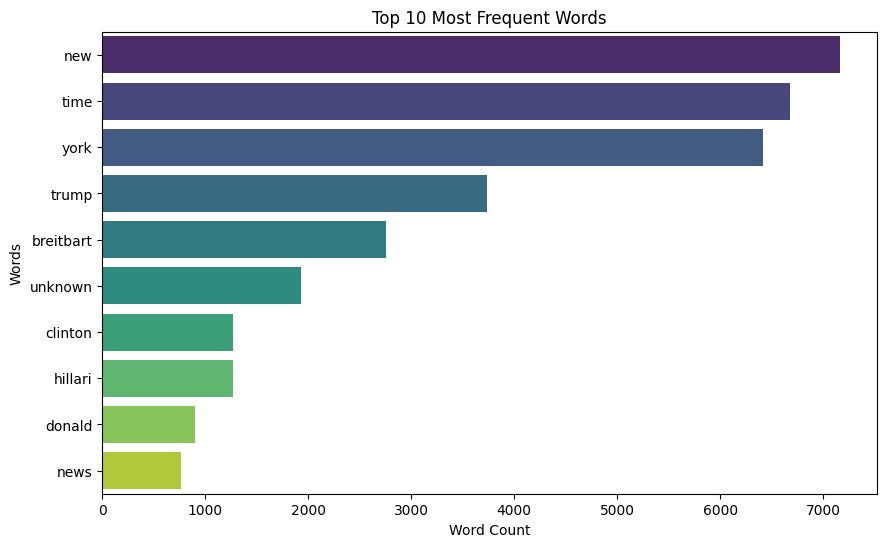

In [100]:
# plotting a word counter
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

news_data['stemm'] = news_data['merge'].apply(stemm)


all_words = [word for text in news_data['merge'] for word in text.split()]

word_counts = Counter(all_words)

common_words = word_counts.most_common(10)

common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the word count visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.savefig('word_count.png', dpi=300, bbox_inches='tight') 
plt.show()


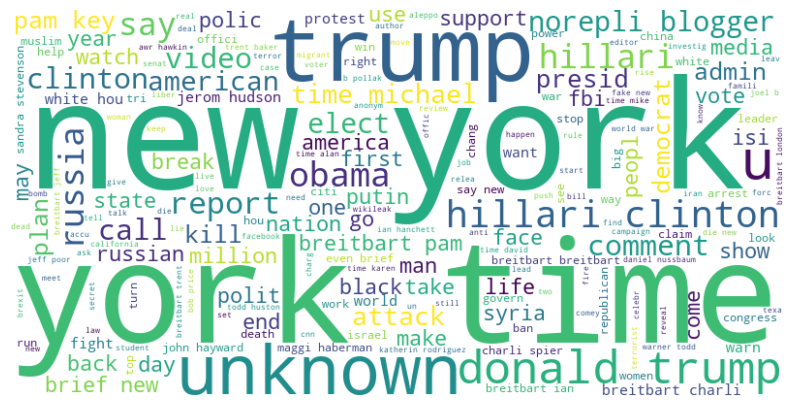

In [101]:
from wordcloud import WordCloud


news_data['stemm'] = news_data['merge'].apply(stemm)


all_text = ' '.join(news_data['stemm'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight') 
plt.show()
